#### Celerix Interview Project

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df=pd.read_excel('Base PRUEBA - ANALITICA.xlsx')
df.head()

,SOLICITUD,FECHA_INICIO,MULTAS_SIMIT,EDAD,CUOTA_INICIAL,GENERO,ESTADO_CIVIL,NIVEL_ESTUDIO,TIPO_VIVIENDA,PERSONAS_CARGO,...,TIPO_CLIENTE,HABITO_PAGO,ENDEUDAMIENTO,CALIFICACION,CREDITOS_VIGENTES,Puntaje Riesgo,TIPO_CONTRATO,ANTIGUEDAD,Marca producto,Estado
0,1,2017-01-02,0.0,29,0,F,Divorciado,Tecnólogico,Arrendada,2,...,Independiente sin Establecimiento,B,85860.0,A,2,2190,Indefinido,10,Marca A,Aprobada
1,2,2017-01-02,0.0,60,1035000,F,Soltero,Tecnólogico,Arrendada,1,...,Independiente sin Establecimiento,E,1270940.0,C,9,2142,Por Obra o Labor,131,Marca A,Desistida
2,3,2017-01-02,0.0,61,472500,M,Divorciado,Tecnólogico,Arrendada,1,...,Independiente sin Establecimiento,E,664620.0,C,7,2073,Indefinido,63,Marca B,Anulada
3,4,2017-01-02,0.0,25,0,M,Casado,Tecnólogico,Arrendada,2,...,Independiente sin Establecimiento,B,51940.0,A,2,1929,Otra,12,Marca A,Negada
4,5,2017-01-02,0.0,30,3672000,F,Divorciado,Tecnólogico,Arrendada,3,...,Independiente sin Establecimiento,B,0.0,A,2,3,INDEPENDIENTE SIN ESTABLECIMIENTO,131,Marca A,Anulada


In [4]:
df.shape

(33668, 27)

In [5]:
df.iloc[0]

SOLICITUD                                            1
FECHA_INICIO                       2017-01-02 00:00:00
MULTAS_SIMIT                                       0.0
EDAD                                                29
CUOTA_INICIAL                                        0
GENERO                                               F
ESTADO_CIVIL                                Divorciado
NIVEL_ESTUDIO                              Tecnólogico
TIPO_VIVIENDA                                Arrendada
PERSONAS_CARGO                                       2
ZONA                                       ZONA BOGOTA
PLAZO                                               48
CODEUDOR                                            Si
VALOR_SOLICITADO                             4513950.0
INGRESOS                                    1157971.36
EGRESOS                                       576300.0
SUBTIPO_CLIENTE                                   INFO
TIPO_CLIENTE         Independiente sin Establecimiento
HABITO_PAG

In [6]:
all_midnight = (df["FECHA_INICIO"].dt.time == pd.to_datetime("00:00:00").time()).all()
print("All times are 00:00:00:", all_midnight)

All times are 00:00:00: True


In [7]:
df["FECHA_INICIO"] = df["FECHA_INICIO"].dt.date

In [8]:
df.iloc[5]

SOLICITUD                                            6
FECHA_INICIO                                2017-01-02
MULTAS_SIMIT                                 1147628.5
EDAD                                                48
CUOTA_INICIAL                                  1800000
GENERO                                               F
ESTADO_CIVIL                                Divorciado
NIVEL_ESTUDIO                              Tecnólogico
TIPO_VIVIENDA                                Arrendada
PERSONAS_CARGO                                       3
ZONA                                        ZONA COSTA
PLAZO                                               36
CODEUDOR                                            Si
VALOR_SOLICITADO                            13639500.0
INGRESOS                                     6720000.0
EGRESOS                                      1356000.0
SUBTIPO_CLIENTE                                   INFO
TIPO_CLIENTE         Independiente con Establecimiento
HABITO_PAG

Comenterio de descripición de variables

In [9]:
df.dtypes

SOLICITUD              int64
FECHA_INICIO          object
MULTAS_SIMIT         float64
EDAD                   int64
CUOTA_INICIAL          int64
GENERO                object
ESTADO_CIVIL          object
NIVEL_ESTUDIO         object
TIPO_VIVIENDA         object
PERSONAS_CARGO         int64
ZONA                  object
PLAZO                  int64
CODEUDOR              object
VALOR_SOLICITADO     float64
INGRESOS             float64
EGRESOS              float64
SUBTIPO_CLIENTE       object
TIPO_CLIENTE          object
HABITO_PAGO           object
ENDEUDAMIENTO        float64
CALIFICACION          object
CREDITOS_VIGENTES      int64
Puntaje Riesgo         int64
TIPO_CONTRATO         object
ANTIGUEDAD             int64
Marca producto        object
Estado                object
dtype: object

In [10]:
df=df.rename(columns={"Puntaje Riesgo":"PUNTAJE_RIESGO", "Marca producto": "MARCA_PRODUCTO", "Estado": "ESTADO"})

In [11]:
CatCols= ['GENERO','ESTADO_CIVIL','NIVEL_ESTUDIO','TIPO_VIVIENDA','ZONA','CODEUDOR','SUBTIPO_CLIENTE',
            'TIPO_CLIENTE','HABITO_PAGO','CALIFICACION','TIPO_CONTRATO','MARCA_PRODUCTO','ESTADO'] #Cathegorical Columns

for row in CatCols:
    df[row] = df[row].astype('string')
df.dtypes

SOLICITUD                     int64
FECHA_INICIO                 object
MULTAS_SIMIT                float64
EDAD                          int64
CUOTA_INICIAL                 int64
GENERO               string[python]
ESTADO_CIVIL         string[python]
NIVEL_ESTUDIO        string[python]
TIPO_VIVIENDA        string[python]
PERSONAS_CARGO                int64
ZONA                 string[python]
PLAZO                         int64
CODEUDOR             string[python]
VALOR_SOLICITADO            float64
INGRESOS                    float64
EGRESOS                     float64
SUBTIPO_CLIENTE      string[python]
TIPO_CLIENTE         string[python]
HABITO_PAGO          string[python]
ENDEUDAMIENTO               float64
CALIFICACION         string[python]
CREDITOS_VIGENTES             int64
PUNTAJE_RIESGO                int64
TIPO_CONTRATO        string[python]
ANTIGUEDAD                    int64
MARCA_PRODUCTO       string[python]
ESTADO               string[python]
dtype: object

In [12]:
df.describe()

,SOLICITUD,MULTAS_SIMIT,EDAD,CUOTA_INICIAL,PERSONAS_CARGO,PLAZO,VALOR_SOLICITADO,INGRESOS,EGRESOS,ENDEUDAMIENTO,CREDITOS_VIGENTES,PUNTAJE_RIESGO,ANTIGUEDAD
count,33668.000000,3.366800e+04,33668.000000,3.366800e+04,33668.000000,33668.000000,3.366800e+04,3.366800e+04,3.366800e+04,3.366800e+04,33668.000000,33668.000000,33668.000000
mean,16834.500000,7.647234e+04,34.103956,6.283836e+05,2.042028,36.404360,4.833895e+06,1.768666e+06,7.119266e+05,3.764307e+05,2.421944,1379.838897,39.079066
std,9719.258768,3.007114e+05,16.251590,7.663405e+05,1.010997,8.509071,1.473938e+06,2.215846e+06,1.360024e+06,1.624263e+06,2.571922,907.210098,55.645814
min,1.000000,0.000000e+00,-1.000000,0.000000e+00,1.000000,6.000000,5.250000e+05,0.000000e+00,0.000000e+00,-2.554600e+05,0.000000,0.000000,0.000000
25%,8417.750000,0.000000e+00,26.000000,1.305000e+05,1.000000,36.000000,3.726450e+06,1.041600e+06,3.390000e+05,0.000000e+00,1.000000,21.000000,8.000000
50%,16834.500000,0.000000e+00,31.000000,4.278240e+05,2.000000,36.000000,4.608450e+06,1.344000e+06,5.650000e+05,1.049400e+05,2.000000,1803.000000,19.000000
75%,25251.250000,0.000000e+00,39.000000,7.380000e+05,3.000000,36.000000,5.782875e+06,1.792000e+06,7.684000e+05,3.498000e+05,3.000000,2139.000000,43.000000
max,33668.000000,6.679191e+06,2000.000000,9.900000e+06,29.000000,60.000000,1.363950e+07,1.563520e+08,8.554100e+07,1.425000e+08,89.000000,2742.000000,637.000000


### Looking for Nans, duplicates and problematic values

In [13]:
def count_string_values(df, column):                             # This function returns the number of repetitions per string value in a column 
    value_counts = df[column].value_counts()
    result = "\n".join([f"{val}: {count}" for val, count in value_counts.items()])
    return result

 Using the function in the cathegorical values to check for mispelled words or blank values

In [14]:

for column in CatCols: print(count_string_values(df, column), "\n") 

F: 22165
M: 11503 

Casado: 15239
Divorciado: 13215
Viudo: 4480
Soltero: 628
Unión Libre: 106 

Tecnólogico: 20800
Primaria: 4458
Universitario: 2257
Técnico: 2119
Secundaria: 1817
Universidad: 1057
Especialización: 889
Ninguno: 132
Postgrado: 93
Bachillerato: 46 

Arrendada: 22392
Propia sin hipoteca: 8672
Propia con hipoteca: 2046
Propia: 353
Sin Patrimonio: 157
Familiar: 48 

ZONA SUROCCIDENTE: 11344
ZONA ANTIOQUIA: 5263
ZONA CENTRO: 4339
ZONA COSTA: 3710
ZONA EJE CAFETERO: 3385
ZONA BOGOTA: 3014
ZONA ORIENTE: 2613 

Si: 33168
No: 500 

INFO: 20819
FORM: 12849 

Independiente sin Establecimiento: 27587
Empleado: 3062
Independiente con Establecimiento: 3019 

B: 23073
E: 8545
C: 1208
A: 388
K: 273
D: 181 

A: 27865
C: 4861
B: 347
AA: 191
D: 161
BB: 86
E: 80
K: 67
CC: 7
-: 3 

Por Obra o Labor: 10059
INDEPENDIENTE SIN ESTABLECIMIENTO: 7572
Indefinido: 5210
Otra: 3785
Temporal: 3062
INDEPENDIENTE CON ESTABLECIMIENTO: 3019
Libre Nombramiento: 496
Carrera Administrati: 32
Provisionalidad

In [15]:
#df['CALIFICACION'].replace('-', 'BBB', inplace=True)  
df.replace({'CALIFICACION':['-', 'BBB']}, inplace=True) # BBB I calculate as the pecieved mean

Now we look for Nans

In [16]:
print(df.isna().sum())

SOLICITUD              0
FECHA_INICIO           0
MULTAS_SIMIT           0
EDAD                   0
CUOTA_INICIAL          0
GENERO                 0
ESTADO_CIVIL           0
NIVEL_ESTUDIO          0
TIPO_VIVIENDA          0
PERSONAS_CARGO         0
ZONA                   0
PLAZO                  0
CODEUDOR               0
VALOR_SOLICITADO       0
INGRESOS               0
EGRESOS                0
SUBTIPO_CLIENTE        0
TIPO_CLIENTE           0
HABITO_PAGO            0
ENDEUDAMIENTO          0
CALIFICACION           0
CREDITOS_VIGENTES      0
PUNTAJE_RIESGO         0
TIPO_CONTRATO        377
ANTIGUEDAD             0
MARCA_PRODUCTO         0
ESTADO                 0
dtype: int64


In [17]:
df.fillna({'TIPO_CONTRATO':'Otra'}, inplace=True) # Reemplazaré los valores en Nan en tipo de contrato con la categoría 'Otra'


In [18]:
#Now for Nulls

df.isnull().values.any()

np.False_

In [19]:
#This function checks for duplicated considering all columns except by the ones specified in exclude_columns
def count_duplicates_excluding(df, exclude_columns,bool):
    check_df = df.drop(columns=exclude_columns)
    duplicates = check_df[check_df.duplicated(keep=bool)]
    return len(duplicates), duplicates

In [20]:
count, dup_rows = count_duplicates_excluding(df, exclude_columns=['SOLICITUD'],bool='first')
print(f"Number of extra duplicated rows (excluding SOLICITUD): {count}") 
df_clean = df.drop(dup_rows.index)

Number of extra duplicated rows (excluding SOLICITUD): 148


In [21]:
count, dup_rows = count_duplicates_excluding(df_clean, exclude_columns=['SOLICITUD','ESTADO'],bool=False)
print(f"Number of total duplicated rows (excluding ESTADO): {count}")  
#print(dup_rows)
#summary = dup_rows.groupby(list(dup_rows.columns)).size().reset_index(name='count')
#print(summary)

Number of total duplicated rows (excluding ESTADO): 1224


In [22]:
counts = df_clean['ESTADO'].value_counts()
print(counts)

ESTADO
Desistida    12265
Negada       10310
Aprobada      6939
Anulada       4006
Name: count, dtype: Int64


In [23]:
NoAnulada_Columns= (
    df_clean.loc[dup_rows.index].groupby(list(dup_rows.columns))
       .apply(lambda g: pd.Series({'Number_of_Not_Anulada': (g['ESTADO'] != 'Anulada').sum()}))
) #columnas con resultado diferente a anulada por grupo de filas duplicadas excluyendo solicitud y estado

#NoAnulada_Columns= (
#    df_clean.loc[dup_rows.index].groupby(list(dup_rows.columns))
#       .count()
#)

count_IV=(NoAnulada_Columns['Number_of_Not_Anulada'].ne(1)).sum() # Cuenta el número de grupos inconsistentetes (Inconsistent Values(IV)) (es decir columnas que estén ej aprobadas y Negadas o aprobadas y desistidas al mismo tiempo)
print(count_IV)
print(NoAnulada_Columns.shape)


0
(612, 1)


C:\Users\Windows 10\AppData\Local\Temp\ipykernel_23384\2371472475.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: pd.Series({'Number_of_Not_Anulada': (g['ESTADO'] != 'Anulada').sum()}))


In [24]:
Anulada_dup=(df_clean.loc[dup_rows.index])['ESTADO'].eq('Anulada')
Anulada_dup=dup_rows[Anulada_dup]
df_clean = df_clean.drop(Anulada_dup.index)

In [25]:
numCols=['MULTAS_SIMIT', 'EDAD', 'CUOTA_INICIAL', 'PERSONAS_CARGO', 'PLAZO',
       'VALOR_SOLICITADO', 'INGRESOS', 'EGRESOS', 'ENDEUDAMIENTO', 'CREDITOS_VIGENTES',
       'PUNTAJE_RIESGO','ANTIGUEDAD']

Ahora buscamos outliers y analizamos cuáles pueden ser inconvenientes para futuras estadísticas

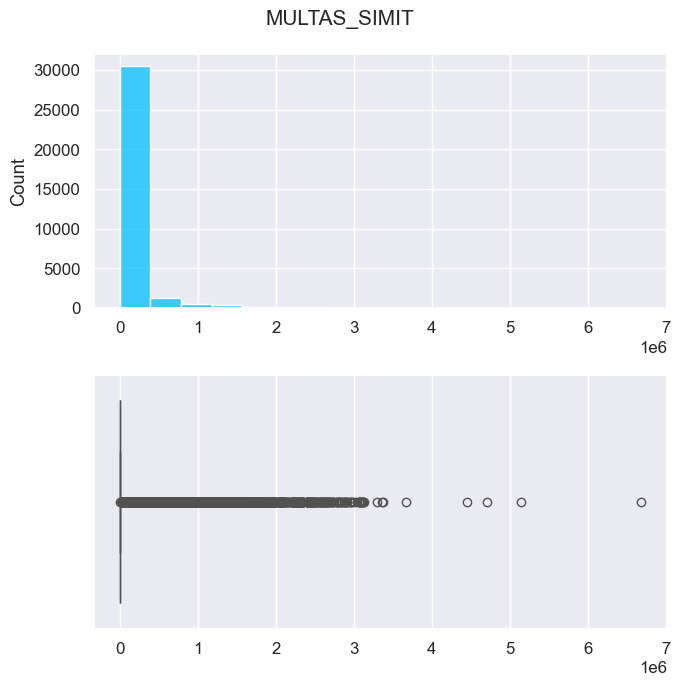

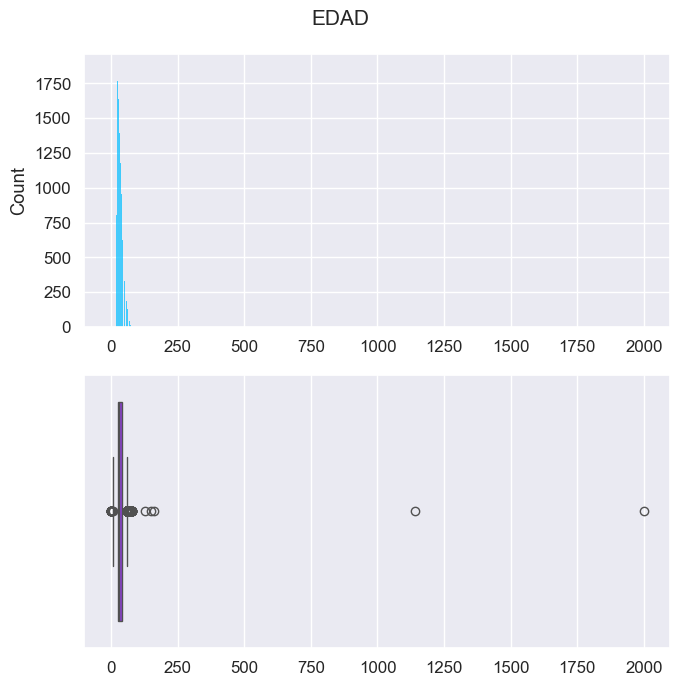

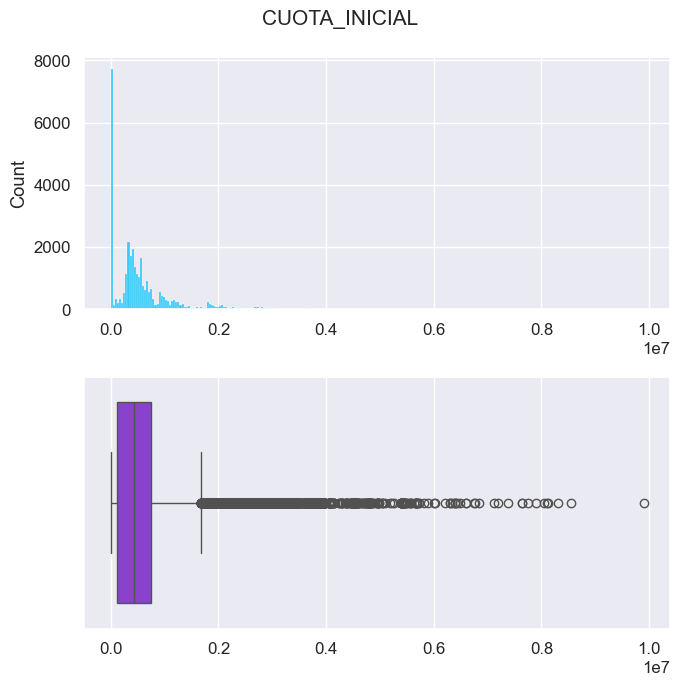

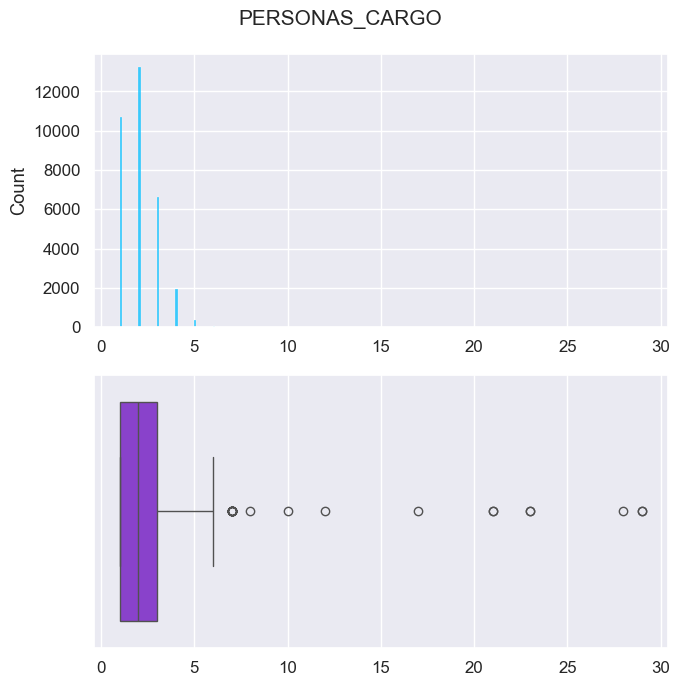

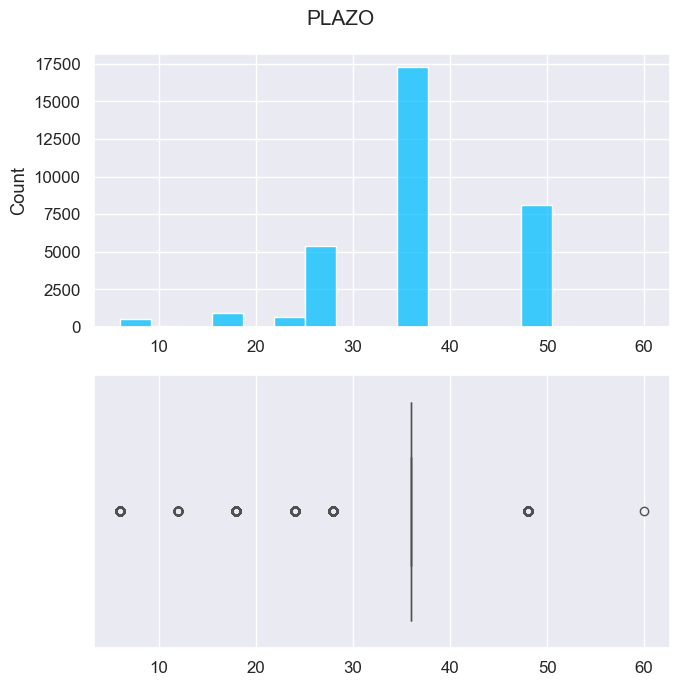

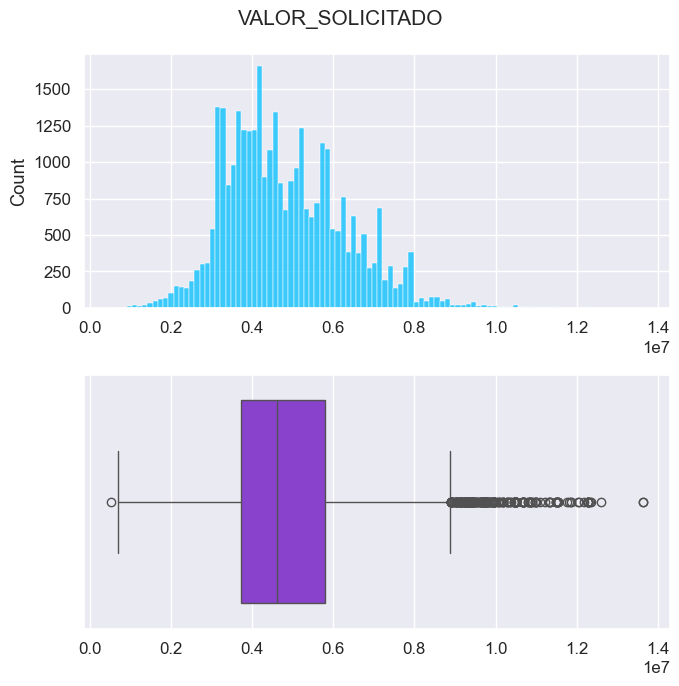

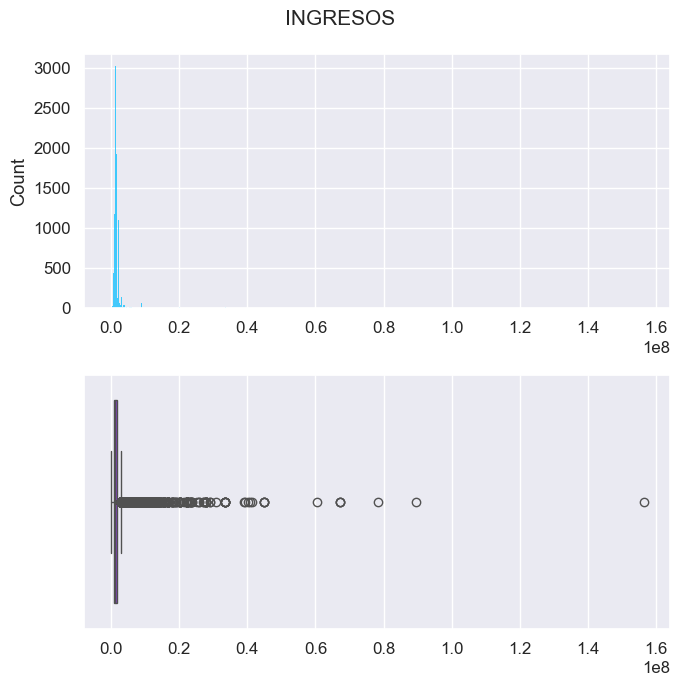

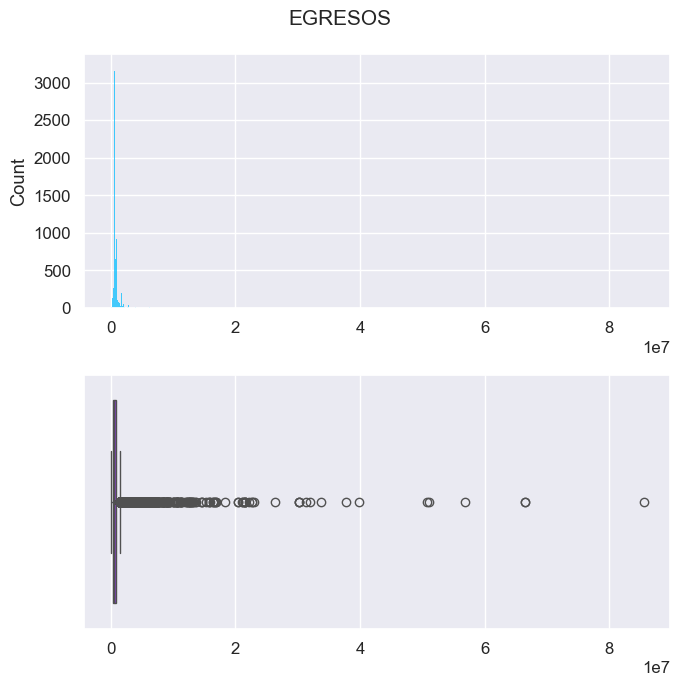

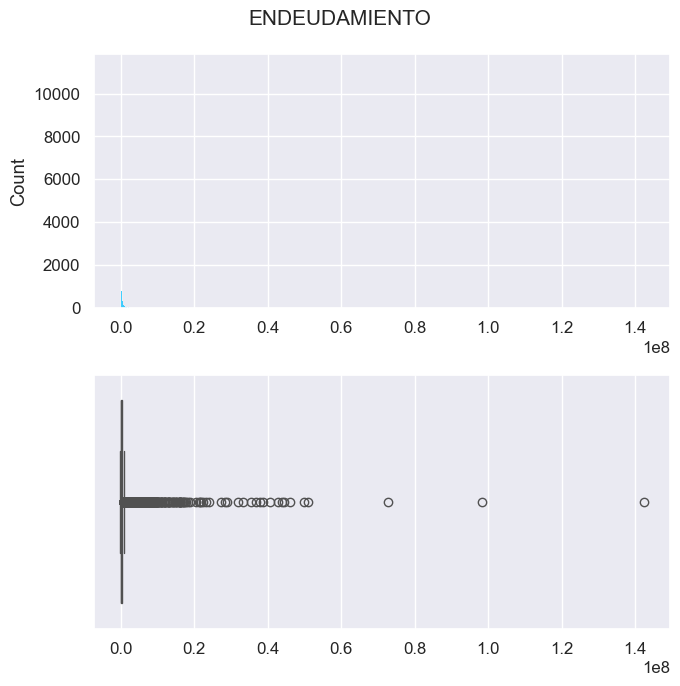

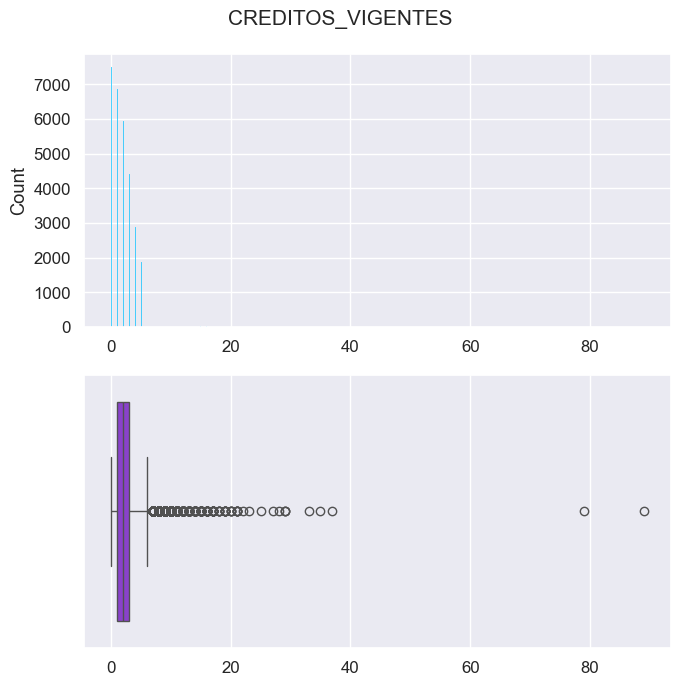

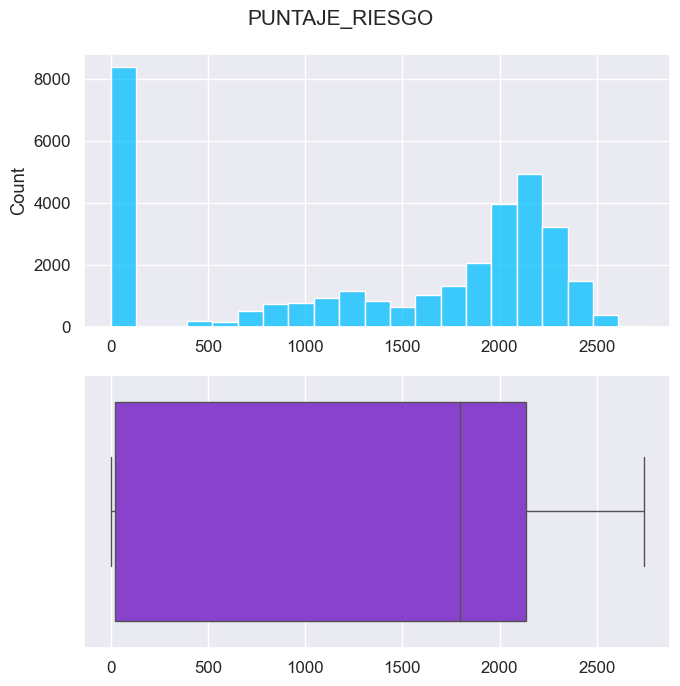

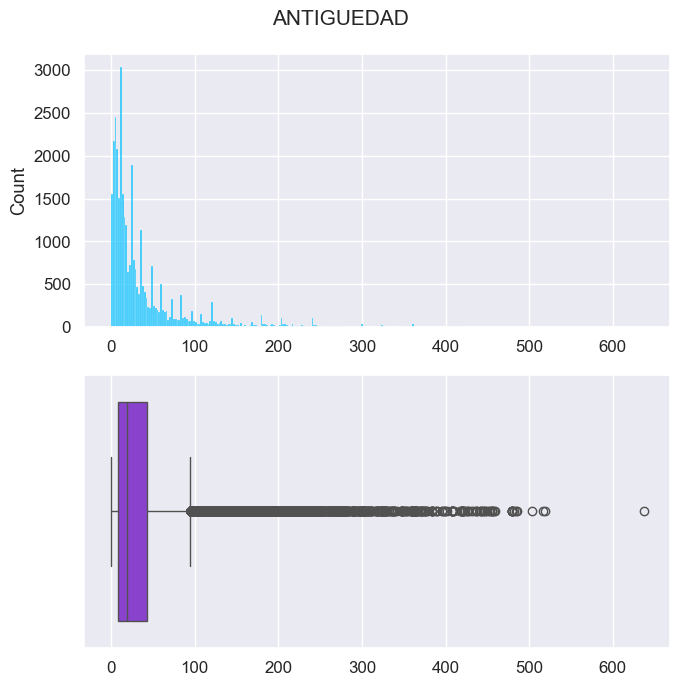

In [26]:
sns.set_theme(font_scale=1.1)
for col in numCols:
    fig,ax = plt.subplots(2,1,figsize=(7,7),tight_layout=True)
    fig.suptitle(col,size=15)
    sns.histplot(x=df_clean[col],ax=ax[0],color='deepskyblue')
    sns.boxplot(x=df_clean[col],ax=ax[1],color='blueviolet')
    ax[0].set_xlabel("")
    ax[1].set_xlabel("")
    plt.show()

In [27]:
def Outliers(column): 
    Q1 = df_clean[column].quantile(0.25)
    Q3 = df_clean[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_clean[(df_clean[column] < lower_bound) | (df_clean[column] > upper_bound)]
    return outliers

In [28]:
out_MS=Outliers('MULTAS_SIMIT')
print(out_MS['MULTAS_SIMIT'].max(),'\n', out_MS['MULTAS_SIMIT'].min())

6679191.45 
 697.64


In [29]:
#Para edad descartamos los valores menores a 18 y mayores a 100
df_clean = df_clean[(df_clean['EDAD'] >= 18) & (df_clean['EDAD'] <= 100)]

In [30]:
out_MS=Outliers('CUOTA_INICIAL')
print(df_clean['CUOTA_INICIAL'].max(),'\n', df_clean['CUOTA_INICIAL'].min())
#El rango de cuota iniciial tiene sentido, lo que no tendría sentido es que la cuota inicial fuera mayor al valor solicitado, por lo que se eliminarán los casos donde la cuota inicial sea mayor al valor solicitado.
df_clean = df_clean[df_clean['CUOTA_INICIAL'] <= df_clean['VALOR_SOLICITADO']]

9900000 
 0


In [31]:
print('PLAZO:', df_clean['PLAZO'].max(),'\n', df_clean['PLAZO'].min())
print('VALOR_SOLICITADO:', df_clean['VALOR_SOLICITADO'].max(),'\n', df_clean['VALOR_SOLICITADO'].min())
print('INGRESOS:', df_clean['INGRESOS'].max(),'\n', df_clean['INGRESOS'].min())
print('EGRESOS:', df_clean['EGRESOS'].max(),'\n', df_clean['EGRESOS'].min())

PLAZO: 60 
 6
VALOR_SOLICITADO: 13639500.0 
 1025286.15
INGRESOS: 156352000.0 
 0.0
EGRESOS: 85540999.99999999 
 0.0


In [32]:
#También considero que la cantidad de creditos activos sea mayor a 30, para un particular o empresa pequeña-mediana, por lo que se eliminarán los casos donde la cantidad de creditos activos sea mayor a 30.
df_clean = df_clean[df_clean['CREDITOS_VIGENTES'] <= 30]

In [33]:
print('Fecha:',df_clean['FECHA_INICIO'].max()   , df_clean['FECHA_INICIO'].min() )
#El rango de las fechas es justo el esperado, por lo que no se eliminarán casos por este motivo.

Fecha: 2017-12-31 2017-01-02


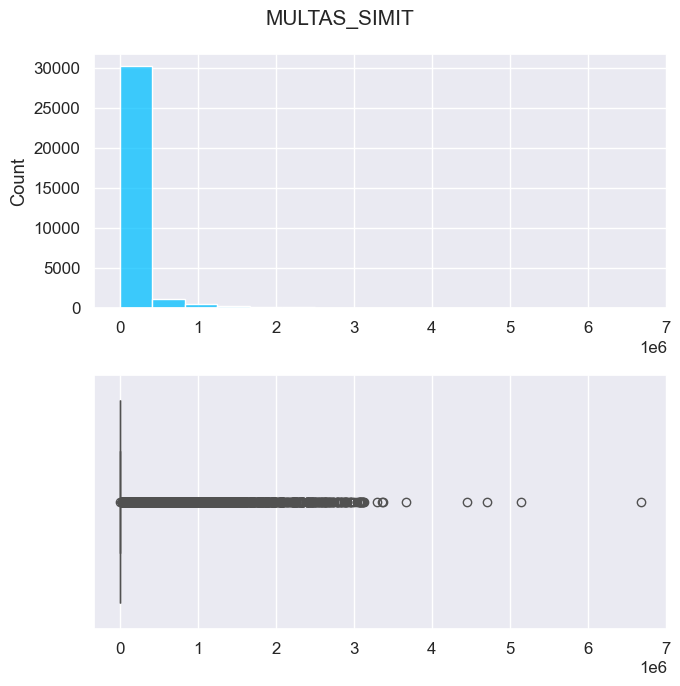

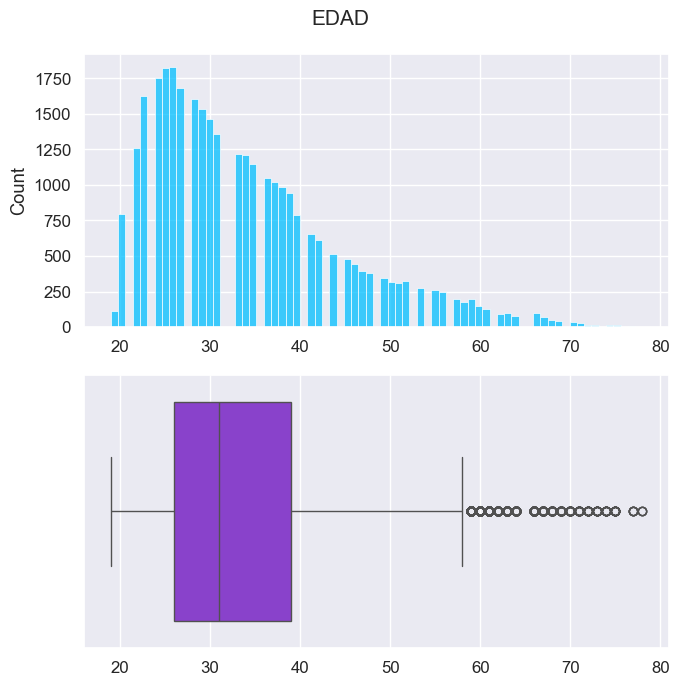

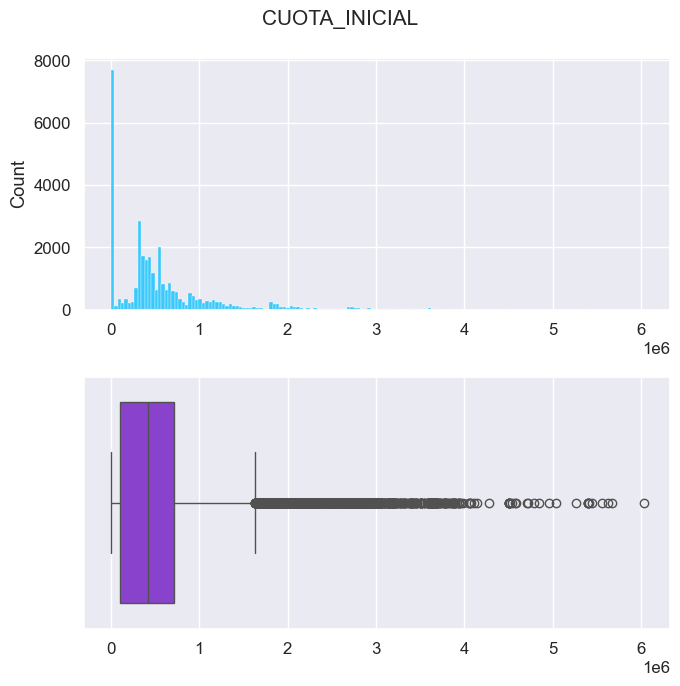

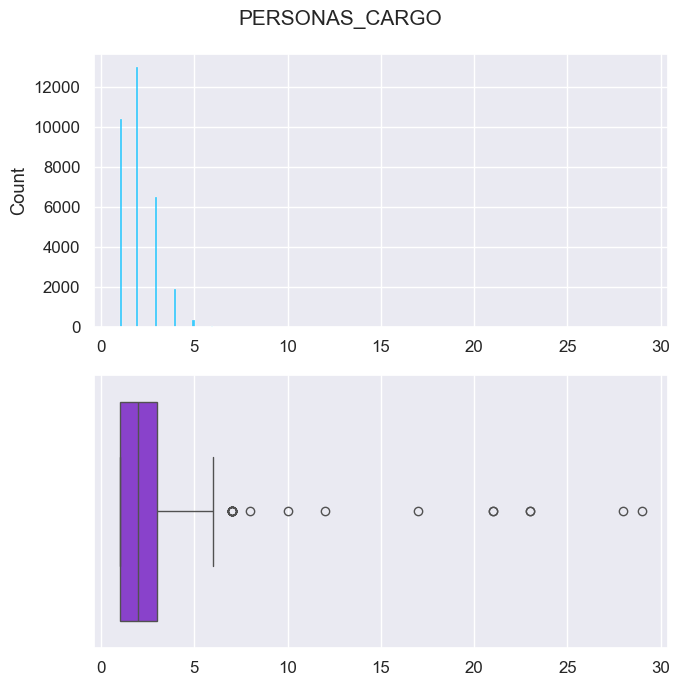

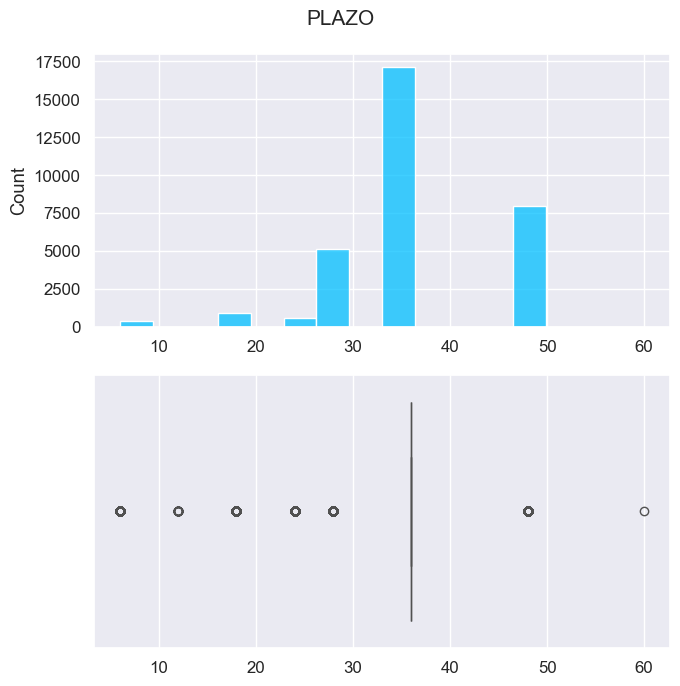

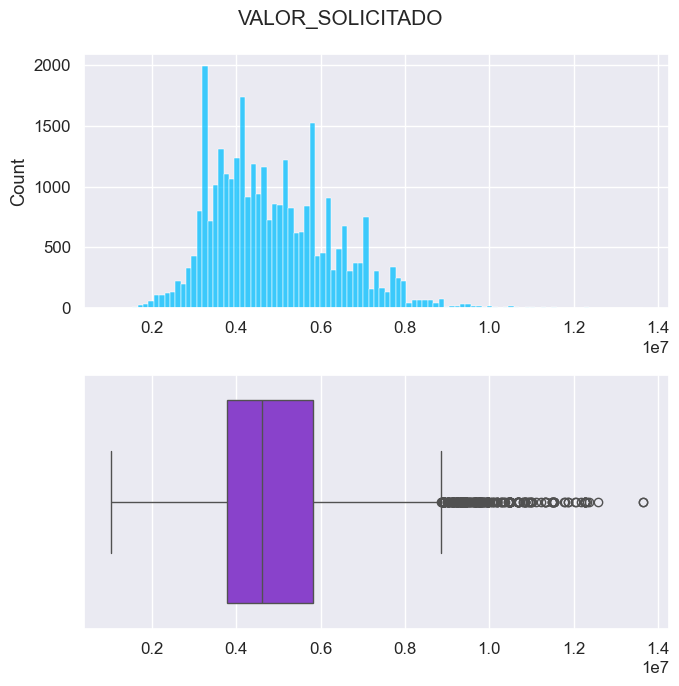

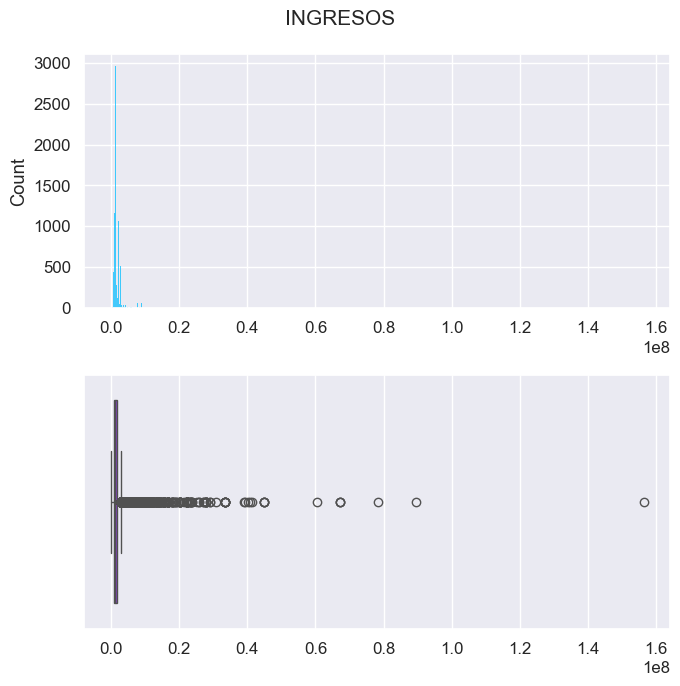

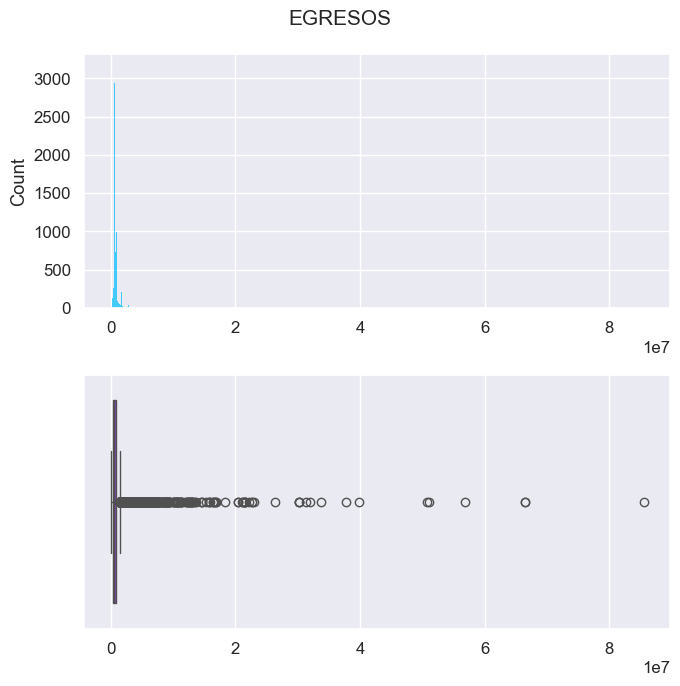

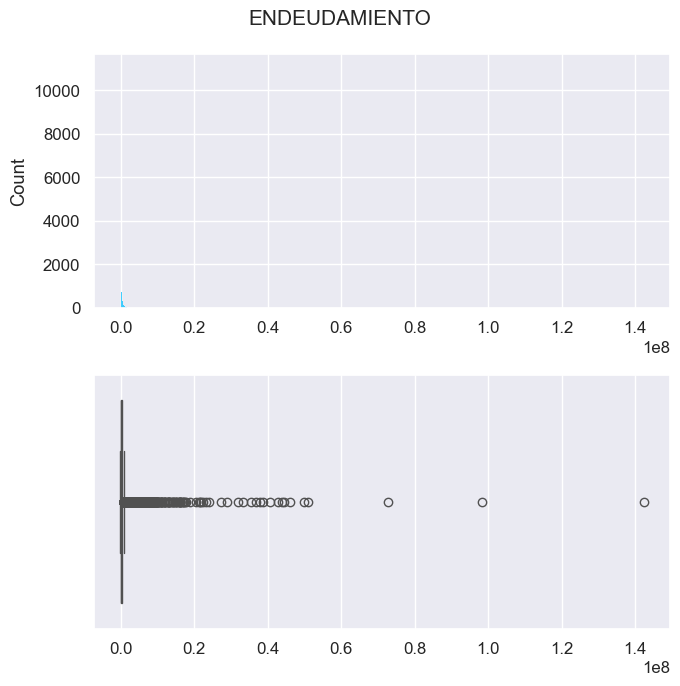

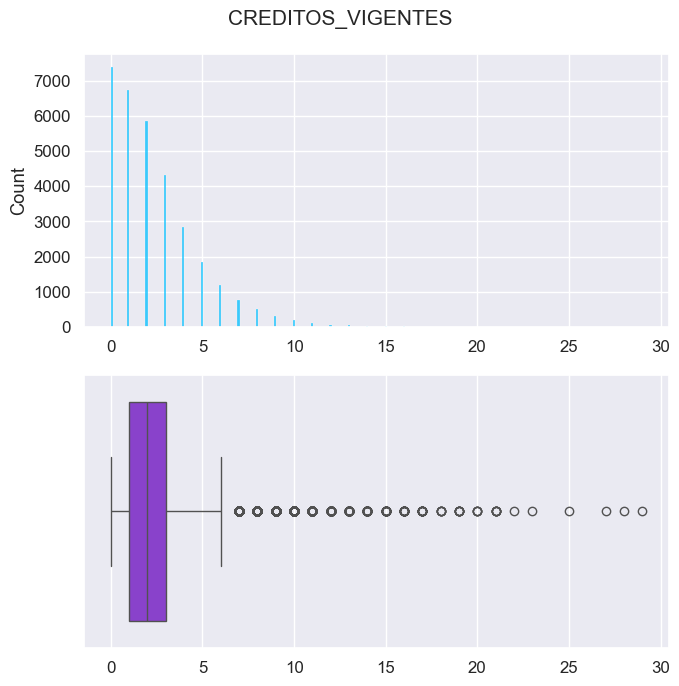

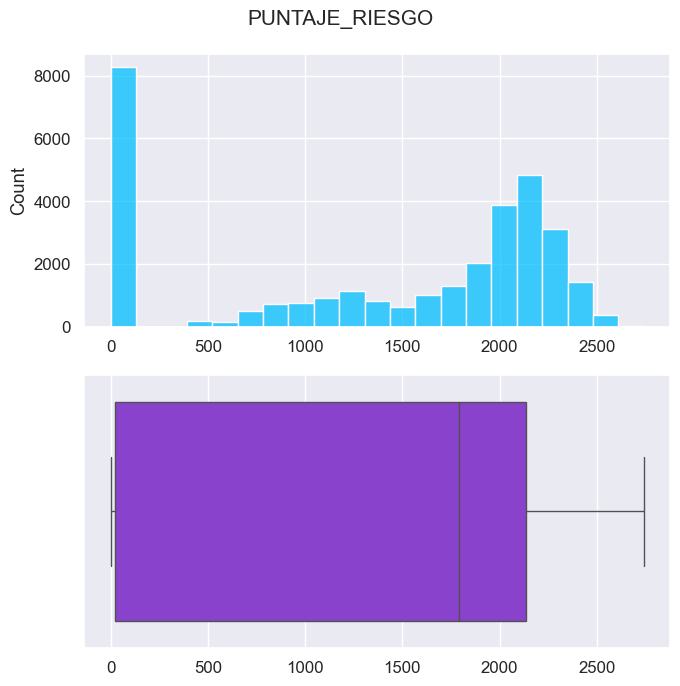

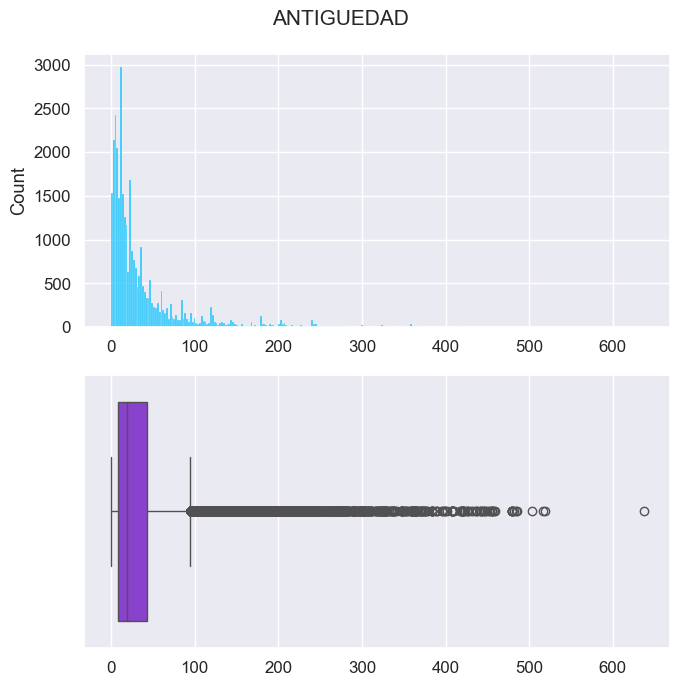

In [34]:
for col in numCols:
    fig,ax = plt.subplots(2,1,figsize=(7,7),tight_layout=True)
    fig.suptitle(col,size=15)
    sns.histplot(x=df_clean[col],ax=ax[0],color='deepskyblue')
    sns.boxplot(x=df_clean[col],ax=ax[1],color='blueviolet')
    ax[0].set_xlabel("")
    ax[1].set_xlabel("")
    plt.show()

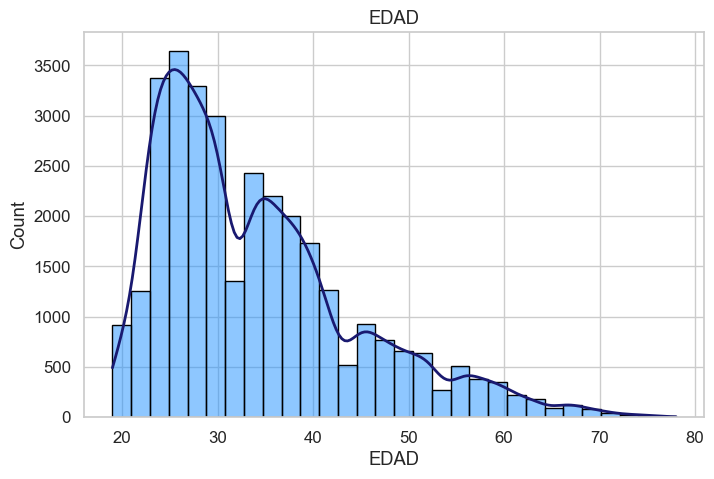

In [93]:

plt.figure(figsize=(8, 5))
sns.set_style("whitegrid")

ax=sns.histplot(
x=df_clean['EDAD'],
bins=30,    
kde=True,
color='dodgerblue', # color of the bars
edgecolor='black', # bar borders
element='bars'     # ensures bars are touching
)

ax.lines[0].set_color('midnightblue')  # color of the KDE line
ax.lines[0].set_linewidth(2)  # width of the KDE line

plt.title('EDAD')
plt.xlabel('EDAD')
plt.ylabel('Count')
plt.show()
